## Import Library

In [76]:
import numpy as np                #olah matriks
import matplotlib.pyplot as plt   #plot grafik
import pandas as pd               #import data

## Ambil Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [134]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/Praktikum 2/iris_species.csv')
df = df.iloc[:,1:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [135]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [136]:
y = np.reshape(y,(-1,1))
y.shape

(150, 1)

## Split data test = 0.2 dan data train = 0.8

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Encode variabel respon

In [138]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train.ravel())
y_test_le  = le.fit_transform(y_test.ravel())

In [139]:
from sklearn.preprocessing import OneHotEncoder
ohe   = OneHotEncoder()
y_train_ohe = ohe.fit_transform(y_train).toarray()
y_test_ohe  = ohe.fit_transform(y_test).toarray()

In [140]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## ANN Model

In [141]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# creating ANN classifier
classifier = Sequential()
# one rule to determine the number of hidden layers
# is to average the number of input and output nodes
classifier.add(Dense(units=6, input_dim=X.shape[1], kernel_initializer='uniform', activation='relu'))
# Add second hidden layers
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
# output layer
# also replace activation function to sigmoid to have probabilities
classifier.add(Dense(units=3, kernel_initializer='uniform', activation='sigmoid'))
# compile the classifier
# adam is a type of SGD
# crossentropy is log loss function, for binary classification, use 'binary_crossentropy' 
# for multiclass classification, use 'categorical_crossentropy'
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [160]:
classifier.fit(X_train, y_train_ohe, validation_data=(X_test,y_test_ohe), epochs=10, batch_size=1) #train

Epoch 1/10
120/120 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.7917 - val_loss: 0.4527 - val_accuracy: 0.6000
Epoch 2/10
120/120 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8083 - val_loss: 0.4335 - val_accuracy: 0.6667
Epoch 3/10
120/120 [==============================] - 0s 1ms/step - loss: 0.3445 - accuracy: 0.8500 - val_loss: 0.4161 - val_accuracy: 0.7000
Epoch 4/10
120/120 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8583 - val_loss: 0.4055 - val_accuracy: 0.7000
Epoch 5/10
120/120 [==============================] - 0s 1ms/step - loss: 0.3163 - accuracy: 0.8750 - val_loss: 0.3936 - val_accuracy: 0.7333
Epoch 6/10
120/120 [==============================] - 0s 1ms/step - loss: 0.3033 - accuracy: 0.8833 - val_loss: 0.3911 - val_accuracy: 0.7333
Epoch 7/10
120/120 [==============================] - 0s 1ms/step - loss: 0.2917 - accuracy: 0.8833 - val_loss: 0.3600 - val_accuracy: 0.8000
Epoch 

## Data Train Cek Report

Text(0.5, 1.0, 'Confusion Matrix')

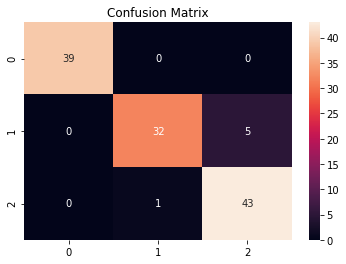

In [168]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred_t = np.argmax(classifier.predict(X_train), axis=-1)
cf_matrix = confusion_matrix(y_train_le.flatten(),y_pred_t.flatten())
ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, ax=ax)
ax.set_title('Confusion Matrix')

In [169]:
from sklearn.metrics import classification_report
print(classification_report(y_train_le.ravel(), y_pred_t.ravel(), target_names=np.unique(y)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.97      0.86      0.91        37
 Iris-virginica       0.90      0.98      0.93        44

       accuracy                           0.95       120
      macro avg       0.96      0.95      0.95       120
   weighted avg       0.95      0.95      0.95       120



## Data Test Cek Report

Text(0.5, 1.0, 'Confusion Matrix')

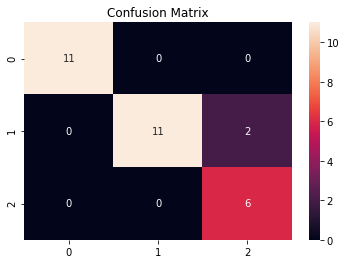

In [167]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = np.argmax(classifier.predict(X_test), axis=-1)
cf_matrix = confusion_matrix(y_test_le.flatten(),y_pred.flatten())
ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, ax=ax)
ax.set_title('Confusion Matrix')

In [170]:
from sklearn.metrics import classification_report
print(classification_report(y_test_le.ravel(), y_pred.ravel(), target_names=np.unique(y)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

       accuracy                           0.93        30
      macro avg       0.92      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30

